In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/home/tim/Coding/20200114 Sales Forecast/1. Original Data/bullets_sales.csv')

In [7]:
df.head()

,Date,Maker,Model,Bullets,Channel,Quantity
0,1810-01-01,Remington,model_1,bullets_A,TF,0
1,1810-01-02,Remington,model_1,bullets_A,TF,2
2,1810-01-03,Remington,model_1,bullets_A,TF,3
3,1810-01-04,Remington,model_1,bullets_A,TF,2
4,1810-01-05,Remington,model_1,bullets_A,TF,3


In [8]:
df = df[df['Channel']=='RS']

In [11]:
df.columns

Index(['Date', 'Maker', 'Model', 'Bullets', 'Channel', 'Quantity'], dtype='object')

In [13]:
df['Quantity'].dtype

dtype('int64')

In [17]:
df = df [['Date','Quantity']]

In [18]:
df.head()

,Date,Quantity
15342,1810-01-01,87
15343,1810-01-02,147
15344,1810-01-03,291
15345,1810-01-04,237
15346,1810-01-05,145


In [20]:
df.columns = ['ds','y']

In [21]:
df.head()

,ds,y
15342,1810-01-01,87
15343,1810-01-02,147
15344,1810-01-03,291
15345,1810-01-04,237
15346,1810-01-05,145


In [42]:
#df.set_index('ds',inplace=True)

In [43]:
df.index = pd.to_datetime(df.index)

In [44]:
df = df.resample(rule='D').sum()

In [50]:
df.reset_index(inplace=True)

In [64]:
df['y'].max()

5676

In [22]:
from fbprophet import Prophet

In [54]:
m = Prophet()

In [55]:
train = df.iloc[:-365]
test = df.iloc[-365:]
len(test)

365

In [56]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future = m.make_future_dataframe(periods=365)

In [58]:
forecast = m.predict(future)

In [89]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2552,1816-12-27,2328.726623,1182.599450,3433.545478,1282.631971,3397.895912,10.553561,10.553561,10.553561,11.650746,11.650746,11.650746,-1.097185,-1.097185,-1.097185,0.0,0.0,0.0,2339.280184
2553,1816-12-28,2327.338822,1090.823596,3426.506788,1276.057274,3402.062470,-14.994675,-14.994675,-14.994675,-7.812147,-7.812147,-7.812147,-7.182528,-7.182528,-7.182528,0.0,0.0,0.0,2312.344147
2554,1816-12-29,2325.951021,1140.192022,3460.710774,1269.482577,3405.827183,-16.043404,-16.043404,-16.043404,-3.415134,-3.415134,-3.415134,-12.628270,-12.628270,-12.628270,0.0,0.0,0.0,2309.907617
2555,1816-12-30,2324.563220,1115.995201,3418.194719,1262.279687,3409.937933,-17.119389,-17.119389,-17.119389,-0.015117,-0.015117,-0.015117,-17.104271,-17.104271,-17.104271,0.0,0.0,0.0,2307.443832
2556,1816-12-31,2323.175420,1132.128937,3456.387972,1254.030526,3414.354137,-17.662342,-17.662342,-17.662342,2.637819,2.637819,2.637819,-20.300161,-20.300161,-20.300161,0.0,0.0,0.0,2305.513077


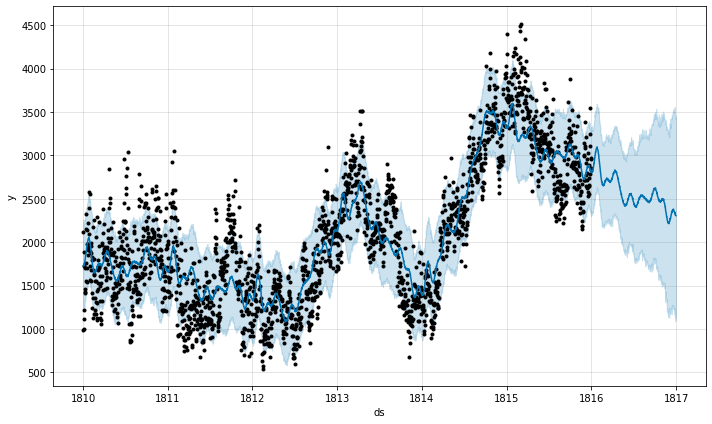

In [88]:
fig = m.plot(forecast);

In [72]:
pd.plotting.register_matplotlib_converters()

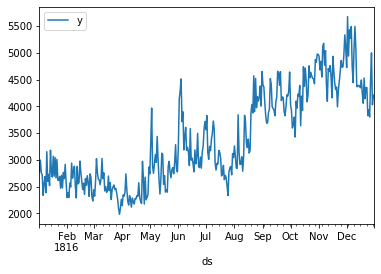

In [75]:
test.plot(x='ds',y='y')

In [96]:
predictions = forecast.iloc[-365:]['yhat']

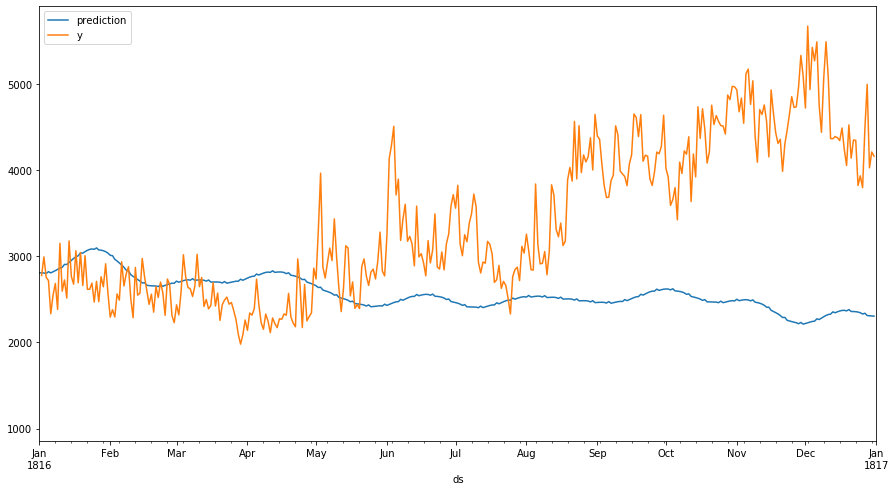

In [92]:
ax = forecast.plot(x='ds',y='yhat', figsize=(15,8),label='prediction',legend=True)
test.plot(x='ds',y='y',ax=ax, xlim=('1816-01-01','1817-01-01'))

In [93]:
from statsmodels.tools.eval_measures import rmse

In [98]:
rmse(test['y'],predictions)

1310.3186503786808

In [99]:
test.mean()

y    3391.871233
dtype: float64